# Project 1 - Classification of Income Data into salary ranges

by: Gabriel Rufino - Matriculation number 808863

### Problem setting
A polling institute wants to be able to estimate an individual’s income from his/her personal data (see einkommen.train). To this aim, 30.000 individuals were interviewed concerning the features summarized below. For some of the individuals, not all features are
available. Crucially, the income of only 5.000 of the interviewee’s is known.
Your task is to predict the income group of the remaining 25.000 interviewees and to
prepare the data such that they can be used for further regression and correlation analyses.

### Imports

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn import tree

### Load CSV, add headers

In [5]:
header = ['age', 'employment_type', 'bias_weight', 'education_level', 'education_period', 'marital_status', 'employment_area', 'partnership', 'ethnicity', 'gender', 'investment_gain', 'investment_loss', 'weekly_workload', 'birth_country', 'income_range']

df = pd.read_csv('data/einkommen.train', names = header)
df


,age,employment_type,bias_weight,education_level,education_period,marital_status,employment_area,partnership,ethnicity,gender,investment_gain,investment_loss,weekly_workload,birth_country,income_range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,?
29996,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,?
29997,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,?
29998,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,?


## Preprocessing

### As we see, some income ranges are unknown (?), which doesn't help our prediction model

In [6]:
counts = df['income_range'].value_counts()
unknown_key = counts.keys()[0]
counts

 ?        25000
 <=50K     3779
 >50K      1221
Name: income_range, dtype: int64

### Remove unknown

In [7]:
df = df[df['income_range'] != unknown_key]
df.head()

,age,employment_type,bias_weight,education_level,education_period,marital_status,employment_area,partnership,ethnicity,gender,investment_gain,investment_loss,weekly_workload,birth_country,income_range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Text values to numerical

In [8]:
numerical_employment = pd.factorize(df['employment_type'])[0]
numerical_employment_area = pd.factorize(df['employment_area'])[0]
numerical_education_level = pd.factorize(df['education_level'])[0]
numerical_marital_status = pd.factorize(df['marital_status'])[0]
numerical_partnership = pd.factorize(df['partnership'])[0]
numerical_ethnicity = pd.factorize(df['ethnicity'])[0]
numerical_gender = pd.factorize(df['gender'])[0]
numerical_birth_country = pd.factorize(df['birth_country'])[0]
numerical_income_range = pd.factorize(df['income_range'])[0]


df['employment_type'] = numerical_employment
df['education_level'] = numerical_education_level
df['marital_status'] = numerical_marital_status
df['partnership'] = numerical_partnership
df['ethnicity'] = numerical_ethnicity
df['gender'] = numerical_gender
df['birth_country'] = numerical_birth_country
df['employment_area'] = numerical_employment_area
df['income_range'] = numerical_income_range
df.head()

<ipython-input-8-9a8993394b4a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employment_type'] = numerical_employment
<ipython-input-8-9a8993394b4a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_level'] = numerical_education_level
<ipython-input-8-9a8993394b4a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,age,employment_type,bias_weight,education_level,education_period,marital_status,employment_area,partnership,ethnicity,gender,investment_gain,investment_loss,weekly_workload,birth_country,income_range
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


### Separate X from y

In [9]:
y = df['income_range']

X = df.drop(['income_range'], axis=1)

X.head()

,age,employment_type,bias_weight,education_level,education_period,marital_status,employment_area,partnership,ethnicity,gender,investment_gain,investment_loss,weekly_workload,birth_country
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1


### Split into train and test data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train and Evaluate
### Log. Regression: Find best C hyperparameter

In [11]:
for c in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 100, 1000, 10000]:
    clf = LogisticRegression(C=c)

    clf.fit(X,y)

    print("C is: " + str(c))
    print(clf.intercept_, clf.coef_)
    print (clf.score(X, y))

C is: 1e-06
[-0.00014929] [[-2.88134141e-03 -3.20756545e-04 -5.30945572e-06 -7.07356918e-04
  -7.41222958e-04 -1.71293978e-04 -1.05198770e-03 -4.48317790e-04
  -8.05379430e-05 -1.52343417e-04  3.07974323e-04  7.73201229e-04
  -3.09761340e-03 -2.45708236e-04]]
0.794
C is: 1e-05
[-0.0016864] [[-2.77639418e-03 -2.87822278e-03 -4.07910758e-06 -8.01733102e-03
  -2.62512586e-03 -1.39182058e-03 -1.20418454e-02 -5.90663217e-03
  -1.03311547e-03 -2.08781742e-03  3.13882665e-04  8.05516350e-04
  -7.13556932e-03 -2.95935355e-03]]
0.7958
C is: 0.0001
[-0.00034555] [[-6.70774345e-03 -7.46585407e-04 -3.84245640e-06 -1.64632420e-03
  -1.72583482e-03 -3.98620374e-04 -2.44799622e-03 -1.04320568e-03
  -1.87421168e-04 -3.54479158e-04  3.19421261e-04  8.23172726e-04
  -7.21192468e-03 -5.71918511e-04]]
0.7952
C is: 0.001
[-0.0003498] [[-6.79074944e-03 -7.55815209e-04 -3.81152100e-06 -1.66667026e-03
  -1.74718852e-03 -4.03547954e-04 -2.47824650e-03 -1.05609373e-03
  -1.89736815e-04 -3.58858173e-04  3.197062

### We'll settle with 100 as after that score doesn't change that much, now predict y for our train set and see how well we predict

### Log. Regression: Train and test

Accuracy on training data: 0.8026865671641791
Accuracy on test data: 0.7751515151515151
[[1170   41]
 [ 330  109]]


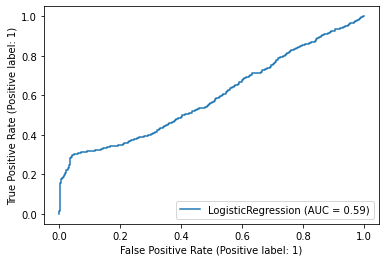

In [12]:
clf = LogisticRegression(C=100)

clf.fit(X_train,y_train)
training_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

print(f"Accuracy on training data: {accuracy_score(y_train, training_predictions)}")
print(f"Accuracy on test data: {accuracy_score(y_test, test_predictions)}")
print(confusion_matrix(y_test, test_predictions))
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

### Support Vector Machine: find best gamma


In [13]:
for c in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 100, 1000, 10000]:
    clf = SVC(gamma=c, C=100, kernel='rbf')

    clf.fit(X,y)

    print("C is: " + str(c))
    print(clf.intercept_)
    print (clf.score(X, y))

C is: 1e-06
[-0.32203208]
0.8464
C is: 1e-05
[-0.60519216]
0.9328
C is: 0.0001
[-0.53345371]
0.9944
C is: 0.001
[-0.49984549]
1.0
C is: 0.01
[-0.5123603]
1.0
C is: 0.1
[-0.51156112]
1.0
C is: 1
[-0.5114369]
1.0
C is: 100
[-0.5115023]
1.0
C is: 1000
[-0.5115023]
1.0
C is: 10000
[-0.5115023]
1.0


### We get really good estimations with gamma > 0.001, so let's use 1.

[0 0 0 ... 0 0 0]
Accuracy on training data: 1.0
Accuracy on test data: 0.7339393939393939
[[1211    0]
 [ 439    0]]


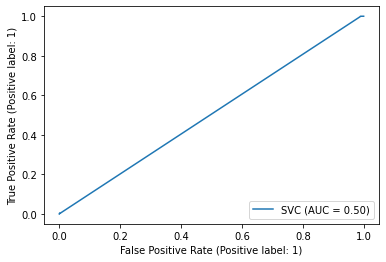

In [14]:
clf = SVC(kernel='rbf',gamma=1, C=100)

clf.fit(X_train,y_train)
training_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print(test_predictions)
print(f"Accuracy on training data: {accuracy_score(y_train, training_predictions)}")
print(f"Accuracy on test data: {accuracy_score(y_test, test_predictions)}")
print(confusion_matrix(y_test, test_predictions))
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

### Let's test some more Linear models

[0 0 0 ... 0 1 0]
Accuracy on training data: 0.7898507462686567
Accuracy on test data: 0.756969696969697
[[1207    4]
 [ 397   42]]


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


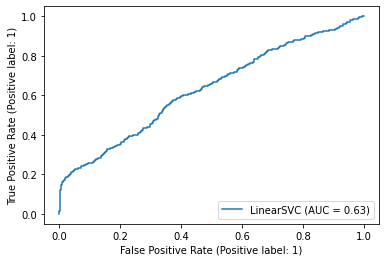

In [15]:
clf = LinearSVC(C=100, max_iter=99999)
clf.fit(X_train,y_train)
training_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print(test_predictions)
print(f"Accuracy on training data: {accuracy_score(y_train, training_predictions)}")
print(f"Accuracy on test data: {accuracy_score(y_test, test_predictions)}")
print(confusion_matrix(y_test, test_predictions))
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0 0 0 ... 0 1 0]
Accuracy on training data: 0.7952238805970149
Accuracy on test data: 0.7654545454545455
[[1207    4]
 [ 383   56]]


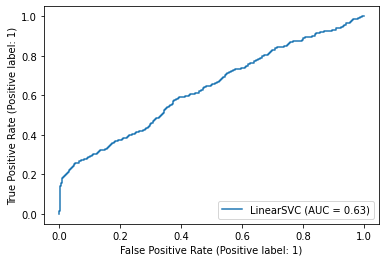

In [16]:
clf = LinearSVC(C=100, max_iter=99999)
clf.fit(X_train,y_train)
training_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print(test_predictions)
print(f"Accuracy on training data: {accuracy_score(y_train, training_predictions)}")
print(f"Accuracy on test data: {accuracy_score(y_test, test_predictions)}")
print(confusion_matrix(y_test, test_predictions))
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

[0 0 0 ... 0 1 0]
Accuracy on training data: 1.0
Accuracy on test data: 0.8333333333333334
[[1136   75]
 [ 200  239]]


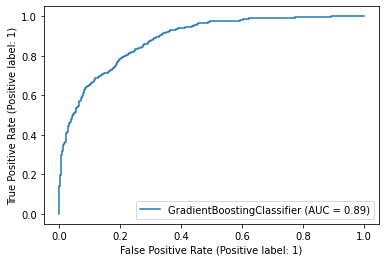

In [17]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=10, random_state=0)
clf.fit(X_train, y_train)
training_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print(test_predictions)
print(f"Accuracy on training data: {accuracy_score(y_train, training_predictions)}")
print(f"Accuracy on test data: {accuracy_score(y_test, test_predictions)}")
print(confusion_matrix(y_test, test_predictions))
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

### But accuracy on test data is still below our Log. Regression, let's try now with non-linear classifier types, such as RandomForest:

Accuracy on training data: 1.0
Accuracy on test data: 0.8321212121212122
[[1125   86]
 [ 191  248]]


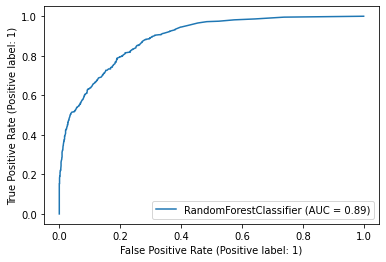

In [18]:
clf = RandomForestClassifier(max_depth=30, n_estimators=100)
clf.fit(X_train, y_train)

training_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

print(f"Accuracy on training data: {accuracy_score(y_train, training_predictions)}")
print(f"Accuracy on test data: {accuracy_score(y_test, test_predictions)}")
print(confusion_matrix(y_test, test_predictions))
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

### And Neural Networks:

In [20]:
inputs = keras.Input(shape=(14,))
x = layers.Dense(100, activation="relu", name="dense_1")(inputs)
y = layers.Dense(100, activation="relu", name="dense_2")(x)
z = layers.Dense(100, activation="relu", name="dense_3")(y)
outputs = layers.Dense(1, activation="softmax", name="predictions")(z)

clf = keras.Model(inputs=inputs, outputs=outputs)


# compile the model
clf.compile(
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.CategoricalAccuracy()],
)

clf.fit(X_train, y_train)

training_predictions = list(map(lambda x: 0 if x == 1 else 1, clf.predict(X_train)))
test_predictions = list(map(lambda x: 0 if x == 1 else 1, clf.predict(X_test)))

print(f"Accuracy on training data: {accuracy_score(y_train, training_predictions)}")
print(f"Accuracy on test data: {accuracy_score(y_test, test_predictions)}")
confusion_matrix(y_test, test_predictions)
print(confusion_matrix(y_test, test_predictions))
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

105/105 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Accuracy on training data: 0.7665671641791045
Accuracy on test data: 0.7339393939393939
[[1211    0]
 [ 439    0]]


ValueError: Functional should be a binary classifier

### Test the best performing models with cross-validation

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=10, random_state=0).fit(X, y)

print(cross_validate(gb_clf, X, y, cv=5))

rf_clf = RandomForestClassifier(max_depth=30, n_estimators=100).fit(X, y)

print(cross_validate(rf_clf, X, y, cv=5))

lr_clf = LogisticRegression(C=100)

print(cross_validate(lr_clf, X, y, cv=5))

Best performance: LogisticRegression
Best results: GradientBoostingClassifier
Best overall: RandomForestClassifier

Results from the three are fairly consistent, but RandomForest has the best value x effort ratio

## Feature Selection

### Now that enough was tested about different models, let's work on Feature Selection, we will focus mainly on Variance and Similarity criterias

In [ ]:
print(f"Variance: ")
print(X.var())

print(f"Standard Deviation: ")
print(X.std())


mutual_info_classif(X,y)

In [ ]:
print(X.shape)
fs = SelectKBest(score_func=chi2, k=11)
# apply feature selection
X_k_selected = fs.fit_transform(X, y)
print(fs.scores_)
X_k_selected

In [21]:
X_k_train, X_k_test, y_k_train, y_k_test = train_test_split(X_k_selected, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=30, n_estimators=100)
clf.fit(X_k_train, y_k_train)

training_predictions = clf.predict(X_k_train)
test_predictions = clf.predict(X_k_test)
#before
#Accuracy on training data: 1.0
#Accuracy on test data: 0.8296969696969697
print(f"Accuracy on training data: {accuracy_score(y_k_train, training_predictions)}")
print(f"Accuracy on test data: {accuracy_score(y_k_test, test_predictions)}")
print(confusion_matrix(y_test, test_predictions))
metrics.plot_roc_curve(clf, X_k_test, y_k_test)
plt.show()

NameError: name 'X_k_selected' is not defined